In [1]:
from citipy import citipy


In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.dyuiko,iuy
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | leshukonskoye
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | bulawayo
Processing Record 10 of Set 1 | milingimbi
City not found. Skipping...
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | kaeo
Processing Record 14 of Set 1 | teya
Processing Record 15 of Set 1 | kristiansund
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | dawei
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | kaitangata
Processing

Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | ornskoldsvik
Processing Record 41 of Set 4 | pasni
Processing Record 42 of Set 4 | auki
Processing Record 43 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 44 of Set 4 | dhidhdhoo
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | urumqi
Processing Record 48 of Set 4 | daru
Processing Record 49 of Set 4 | kahului
Processing Record 50 of Set 4 | tuatapere
Processing Record 1 of Set 5 | zeya
Processing Record 2 of Set 5 | tsogni
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | koslan
Processing Record 5 of Set 5 | biltine
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 | samusu
City not found. Skipping...
Processing Record 8 of Set 5 | acajutla
Processing Record 9 of Set 5 | ust-omchug
Processing Record 10 of Set 5 | elk river
Processing Record 11 of Se

Processing Record 27 of Set 8 | santa isabel do rio negro
Processing Record 28 of Set 8 | san luis potosi
Processing Record 29 of Set 8 | srivardhan
Processing Record 30 of Set 8 | alberton
Processing Record 31 of Set 8 | itoman
Processing Record 32 of Set 8 | trincomalee
Processing Record 33 of Set 8 | vanavara
Processing Record 34 of Set 8 | zvishavane
Processing Record 35 of Set 8 | cap malheureux
Processing Record 36 of Set 8 | ishigaki
Processing Record 37 of Set 8 | boddam
Processing Record 38 of Set 8 | valea crisului
Processing Record 39 of Set 8 | amahai
Processing Record 40 of Set 8 | qabis
City not found. Skipping...
Processing Record 41 of Set 8 | paz de ariporo
City not found. Skipping...
Processing Record 42 of Set 8 | nokaneng
Processing Record 43 of Set 8 | boa vista
Processing Record 44 of Set 8 | victor harbor
Processing Record 45 of Set 8 | oyama
Processing Record 46 of Set 8 | dawson creek
Processing Record 47 of Set 8 | makakilo city
Processing Record 48 of Set 8 |

Processing Record 17 of Set 12 | sao joao da barra
Processing Record 18 of Set 12 | burnie
Processing Record 19 of Set 12 | mustasaari
Processing Record 20 of Set 12 | gusau
Processing Record 21 of Set 12 | srandakan
Processing Record 22 of Set 12 | beira
Processing Record 23 of Set 12 | kachiry
Processing Record 24 of Set 12 | aden
Processing Record 25 of Set 12 | piacabucu
Processing Record 26 of Set 12 | rocha
Processing Record 27 of Set 12 | taoudenni
Processing Record 28 of Set 12 | tottori
Processing Record 29 of Set 12 | tateyama
Processing Record 30 of Set 12 | bosaso
Processing Record 31 of Set 12 | saldanha
Processing Record 32 of Set 12 | conway
Processing Record 33 of Set 12 | bolshoye ignatovo
City not found. Skipping...
Processing Record 34 of Set 12 | suhbaatar
Processing Record 35 of Set 12 | nadym
Processing Record 36 of Set 12 | marion
Processing Record 37 of Set 12 | boyuibe
Processing Record 38 of Set 12 | ust-karsk
Processing Record 39 of Set 12 | morgan city
Proce

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.82,75,7,23.55,PF,2022-02-05 19:01:07
1,Vaini,-21.2000,-175.2000,77.16,94,100,8.05,TO,2022-02-05 19:03:29
2,Ushuaia,-54.8000,-68.3000,64.06,45,40,14.97,AR,2022-02-05 18:58:52
3,Rikitea,-23.1203,-134.9692,78.80,72,100,11.70,PF,2022-02-05 19:01:02
4,Upernavik,72.7868,-56.1549,-0.85,98,100,4.74,GL,2022-02-05 19:02:18
5,Leshukonskoye,64.8989,45.7622,5.02,94,100,8.12,RU,2022-02-05 19:03:29
6,Hofn,64.2539,-15.2082,28.76,55,100,9.98,IS,2022-02-05 18:58:55
7,Bulawayo,-20.1500,28.5833,64.53,75,54,9.22,ZW,2022-02-05 19:00:25
8,Talnakh,69.4865,88.3972,-17.63,100,100,3.18,RU,2022-02-05 19:01:03
9,Kaeo,-35.1000,173.7833,73.33,98,91,7.18,NZ,2022-02-05 19:03:30


In [12]:
city_data

[{'City': 'Atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 78.82,
  'Humidity': 75,
  'Cloudiness': 7,
  'Wind Speed': 23.55,
  'Country': 'PF',
  'Date': '2022-02-05 19:01:07'},
 {'City': 'Vaini',
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 77.16,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 8.05,
  'Country': 'TO',
  'Date': '2022-02-05 19:03:29'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 64.06,
  'Humidity': 45,
  'Cloudiness': 40,
  'Wind Speed': 14.97,
  'Country': 'AR',
  'Date': '2022-02-05 18:58:52'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 78.8,
  'Humidity': 72,
  'Cloudiness': 100,
  'Wind Speed': 11.7,
  'Country': 'PF',
  'Date': '2022-02-05 19:01:02'},
 {'City': 'Upernavik',
  'Lat': 72.7868,
  'Lng': -56.1549,
  'Max Temp': -0.85,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 4.74,
  'Country': 'GL',
  'Date': '2022-02-05 19:02:18'},
 {'City': 'Leshukonskoye',
  'Lat': 64.8989,
  

In [13]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644088651.2570088

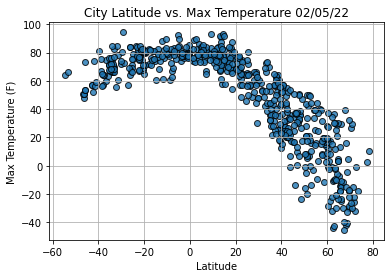

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

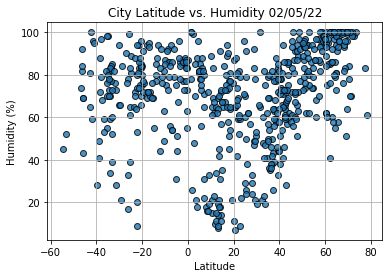

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

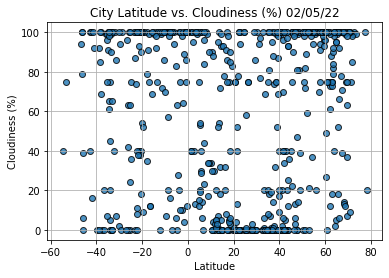

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

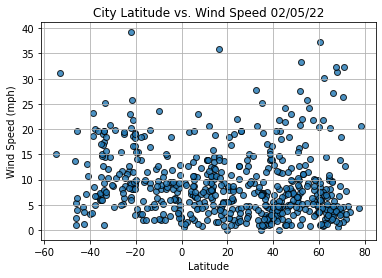

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13=city_data_df.loc[13]
index13


City                        Dawei
Country                        MM
Date          2022-02-05 19:03:30
Lat                       14.0833
Lng                          98.2
Max Temp                    71.56
Humidity                       91
Cloudiness                     32
Wind Speed                   3.83
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Upernavik,GL,2022-02-05 19:02:18,72.7868,-56.1549,-0.85,98,100,4.74
5,Leshukonskoye,RU,2022-02-05 19:03:29,64.8989,45.7622,5.02,94,100,8.12
6,Hofn,IS,2022-02-05 18:58:55,64.2539,-15.2082,28.76,55,100,9.98
8,Talnakh,RU,2022-02-05 19:01:03,69.4865,88.3972,-17.63,100,100,3.18
10,Teya,RU,2022-02-05 19:03:30,60.3778,92.6267,17.64,89,100,8.55


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

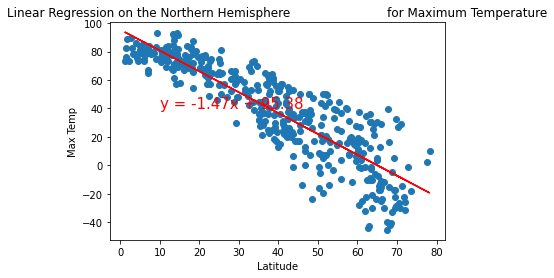

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

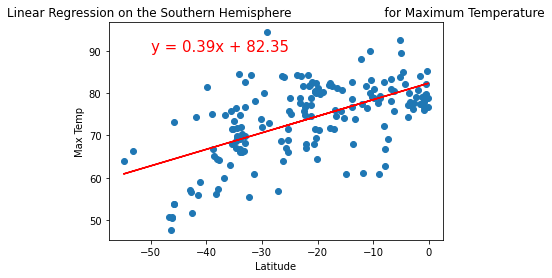

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for Maximum Temperature', 'Max Temp',(-50,90))

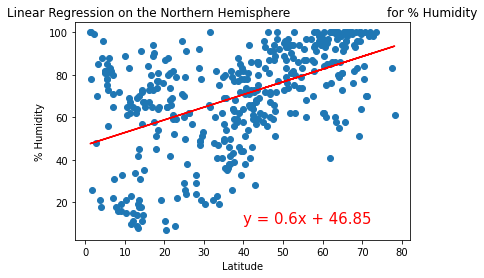

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

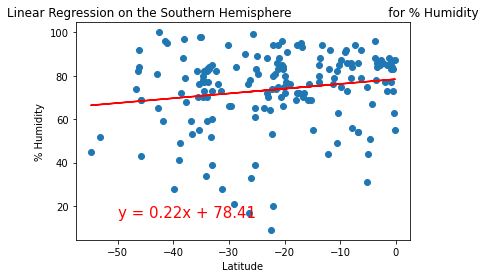

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

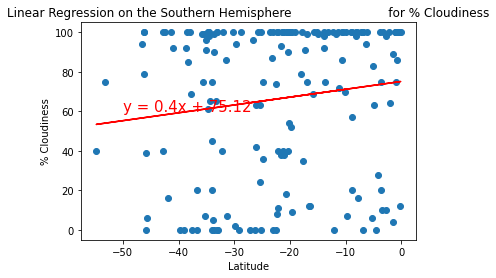

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

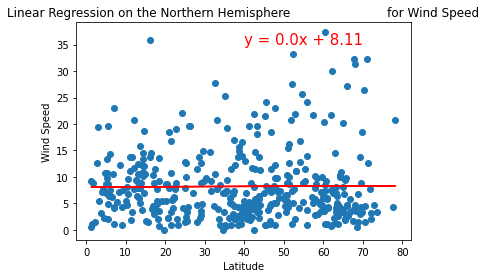

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

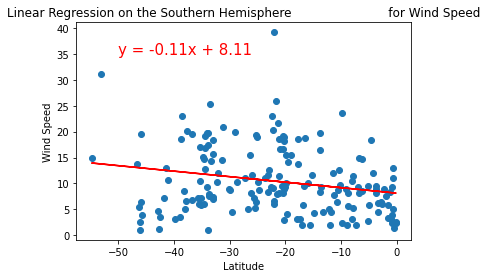

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [32]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [33]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Atuona,PF,2022-02-05 19:01:07,-9.8000,-139.0333,78.82,75,7,23.55
1,1,Vaini,TO,2022-02-05 19:03:29,-21.2000,-175.2000,77.16,94,100,8.05
2,2,Ushuaia,AR,2022-02-05 18:58:52,-54.8000,-68.3000,64.06,45,40,14.97
3,3,Rikitea,PF,2022-02-05 19:01:02,-23.1203,-134.9692,78.80,72,100,11.70
4,4,Upernavik,GL,2022-02-05 19:02:18,72.7868,-56.1549,-0.85,98,100,4.74


In [34]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [35]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [36]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

InvalidWeightException: -0.85 is not a valid weight. Weights must be non-negative.

In [ ]:
fig

In [37]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [38]:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

InvalidWeightException: -0.85 is not a valid weight. Weights must be non-negative.

In [39]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

In [40]:
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [45]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Atuona,PF,2022-02-05 19:01:07,-9.8000,-139.0333,78.82,75,7,23.55
1,1,Vaini,TO,2022-02-05 19:03:29,-21.2000,-175.2000,77.16,94,100,8.05
3,3,Rikitea,PF,2022-02-05 19:01:02,-23.1203,-134.9692,78.80,72,100,11.70
16,16,Butaritari,KI,2022-02-05 19:00:19,3.0707,172.7902,82.36,70,13,19.37
18,18,Sumbe,AO,2022-02-05 19:03:31,-11.2061,13.8437,76.41,79,72,7.76
19,19,Ranong,TH,2022-02-05 19:03:31,9.9658,98.6348,75.60,89,34,5.44
23,23,La Asuncion,VE,2022-02-05 19:03:32,11.0333,-63.8628,80.73,69,4,13.80
38,38,Lorengau,PG,2022-02-05 19:01:01,-2.0226,147.2712,80.64,77,64,7.56
40,40,Oistins,BB,2022-02-05 19:01:24,13.0667,-59.5333,78.30,69,7,12.41
42,42,Oussouye,SN,2022-02-05 19:04:34,12.4850,-16.5469,79.57,34,5,9.48


In [46]:
city_data_df


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Atuona,PF,2022-02-05 19:01:07,-9.8000,-139.0333,78.82,75,7,23.55
1,1,Vaini,TO,2022-02-05 19:03:29,-21.2000,-175.2000,77.16,94,100,8.05
2,2,Ushuaia,AR,2022-02-05 18:58:52,-54.8000,-68.3000,64.06,45,40,14.97
3,3,Rikitea,PF,2022-02-05 19:01:02,-23.1203,-134.9692,78.80,72,100,11.70
4,4,Upernavik,GL,2022-02-05 19:02:18,72.7868,-56.1549,-0.85,98,100,4.74
...,...,...,...,...,...,...,...,...,...,...
579,579,Tromso,NO,2022-02-05 19:17:27,69.6496,18.9570,32.65,64,75,18.41
580,580,Zhangye,CN,2022-02-05 19:15:13,38.9342,100.4517,18.52,62,100,2.86
581,581,Vila,PT,2022-02-05 19:17:28,42.0304,-8.1588,44.33,73,0,4.81
582,582,Dalby,AU,2022-02-05 19:17:28,-27.1833,151.2667,56.98,90,0,11.12


In [47]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Atuona,PF,78.82,-9.8000,-139.0333,
1,Vaini,TO,77.16,-21.2000,-175.2000,
3,Rikitea,PF,78.80,-23.1203,-134.9692,
16,Butaritari,KI,82.36,3.0707,172.7902,
18,Sumbe,AO,76.41,-11.2061,13.8437,
19,Ranong,TH,75.60,9.9658,98.6348,
23,La Asuncion,VE,80.73,11.0333,-63.8628,
38,Lorengau,PG,80.64,-2.0226,147.2712,
40,Oistins,BB,78.30,13.0667,-59.5333,
42,Oussouye,SN,79.57,12.4850,-16.5469,


In [48]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [49]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import g_key

In [52]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEAGFrgBEln1gzDFNOZhM063oC8A7JpaGaMBwZJeZE6Yx7Wgexzw5aRTVJtbt-Ms_mJ0BuEeaQ9v-fxEI8pRqmzVZ9c_20LQjuWUIr8ijHZmDz5OyMzyXRtCInDHzklkWYyaGY_BxmhUS-NJ-whsN096O1EOuyPWxx_r_RANWQ2jk9AMd_IRPi-8g2uKjSnuO-RKQ8RwRjyJmHj1pySSs7Nr50jByOR6zZ-Ej_eCSuO4HFqtK_UW9flxoy9hbxy6iFNrW8jIwVc-tNYU_09dfWqMiEzGAfhb0nQND_vqPM9EcGgvE9rS3PKdVBo0TkaT3hx0ej8TutLMS3f3GH__bWnZ6iQe1JNgAlJgwWRxdX5N32jcSbDnvaCYEg_65hRgdh-H844gMhL3e4ctnn-gsjeearZxIWJaEiUhqJiLEgGcm6l0HC02Jp3Y',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [66]:
len(hotels["results"]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_22504/149793342.py, line 1)

In [60]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
 
# Grab the first hotel from the results and store the name.
  try:
    hotel_df.loc[index,"Hotel Name"] = hotels["results"][0]["name"]
  except (IndexError,NewError):
    print("Hotel not found... skipping.")

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [62]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [63]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

NameError: name 'hotel_info' is not defined

In [65]:
len(hotels["results"]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_22504/149793342.py, line 1)